# Titanic-Project
This is a project for Udemy course using data provided by Kaggle, Titanic: Machine Learning from Disaster.
The goal is to demonstrate data handling, analysis, and visualization learned throughout the course. 

Here are some questions answered in this report:

1. Who were the passengers on the Titanic (Gender, Class, Age,etc)?
2. What deck were the passengers on and how does that relate to their class?
3. Where did the passengers come from?
4. Who was alone and who was with family?
5. What factors helped some survive the sinking?
  * Did the deck have any effects on the passengers survival rate?
  * Did having a family member increase odds of surviving the crash?


In [421]:
# Import tools needed for analysis and visualization
import pandas as pd
from pandas import Series, DataFrame

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Handling

In [422]:
titanic_df = pd.read_csv('titanic-data.csv')

In [423]:
# Show preview of the data
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [424]:
# Overall information for the dataset 
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


There are a lot of missing values for Cabin info. This issue will be handled later by dropping them from dataframe for further analysis.

### Passengers Distribution by Gender

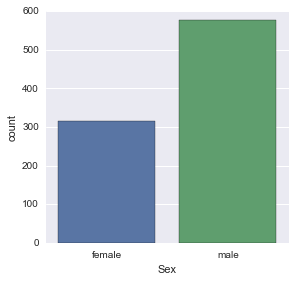

In [425]:
sns.factorplot('Sex',data=titanic_df,kind= 'count',order=('female','male'))

There were approximately twice as many male passengers as female passengers boarded Titanic.

To break down the demographics of passengers, separating the genders by classes.

### Passenger Class Distribution by Gender


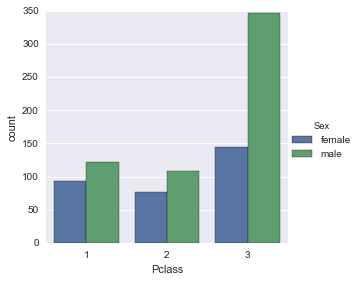

In [426]:
sns.factorplot('Pclass',data=titanic_df,hue ='Sex', kind='count',hue_order = ['female','male'])

There is no significant difference in number of passengers between male and female for the 1st and 2nd class. However, number of male passengers is more than double of female passengers for the 3rd class.

For further detail on demographics, adding a new column '*person*' to categorize passengers under 16 as child.

### Add New Column *person*
Create a function called **male_female_child** that sorts through passengers and group by male, female, and child.

In [427]:
def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

Apply the function to the data and preview first 10 rows.

In [428]:
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child, axis = 1)

titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


### Passenger Class Distribution by Gender + Child

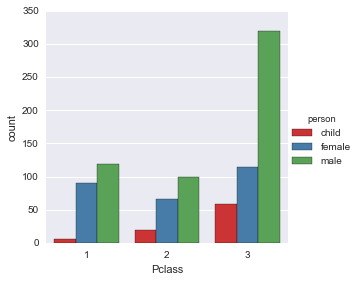

In [429]:
sns.factorplot('Pclass',data=titanic_df, hue='person',kind = 'count', hue_order = ['child','female','male'],palette='Set1')

Actual number comparison of  male, female, and child by class.

In [571]:
titanic_df.pivot_table(values='PassengerId',index='person',columns='Pclass',aggfunc='count',margins=True)

Pclass,1,2,3,All
person,,,,
child,6.0,19.0,58.0,83.0
female,91.0,66.0,114.0,271.0
male,119.0,99.0,319.0,537.0
All,216.0,184.0,491.0,891.0


From histogram and pivot table, we can see there were less child passengers boarded compared to adult passengers.

To dig deeper in age composition of the passengers, create a histogram for the distribution. 

### Passengers Distribution by Age

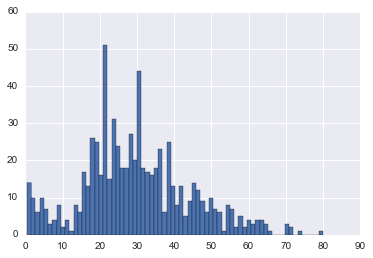

In [431]:
titanic_df['Age'].hist(bins=70)

As we can see from the histogrm, a lot of passengers are concentrated around age 20-30.

To get actual passengers' average age, using describe function.

In [432]:
titanic_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [638]:
years = [0,10,20,30,40,50,60,70,80]

titanic_male_age = pd.cut(titanic_df['Age'][titanic_df['Sex']=='male'],years)
titanic_female_age = pd.cut(titanic_df['Age'][titanic_df['Sex']=='female'],years)

titanic_male_age.value_counts(sort= False).align(titanic_female_age.value_counts(sort=False))

((0, 10]      33
 (10, 20]     69
 (20, 30]    149
 (30, 40]    100
 (40, 50]     55
 (50, 60]     28
 (60, 70]     14
 (70, 80]      5
 Name: Age, dtype: int64, (0, 10]     31
 (10, 20]    46
 (20, 30]    81
 (30, 40]    55
 (40, 50]    31
 (50, 60]    14
 (60, 70]     3
 (70, 80]     0
 Name: Age, dtype: int64)

### Passenger Age Distribution by Gender

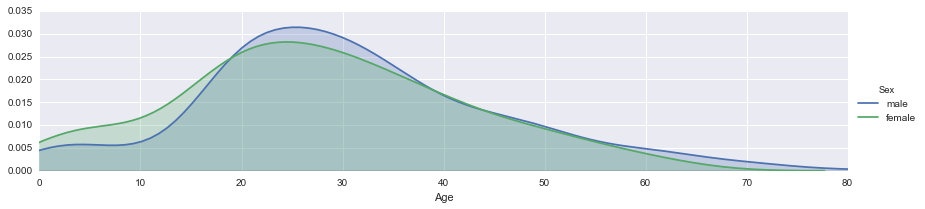

In [433]:
fig = sns.FacetGrid(titanic_df, hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()

fig.set(xlim= (0,oldest))

fig.add_legend()

We can clearly see that both male and female age distribution is right-skewed as KDE provides better picture compared to histogram. Next separate child from gender to find out if there's any significant change in the distribution.

### Passenger Age Distribution by Gender + Child

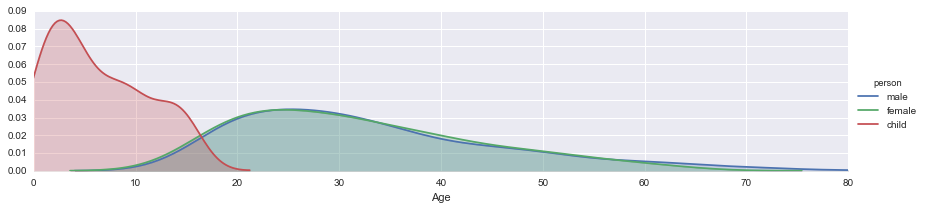

In [434]:
fig = sns.FacetGrid(titanic_df, hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

fig.set(xlim=(0,oldest))
fig.add_legend()

After separating child from gender, male and female distribution is still right-skewed and almost perfectly overlapped. This implies there are more female who is under 16 than male.

### Passenger Age Distribution by Class

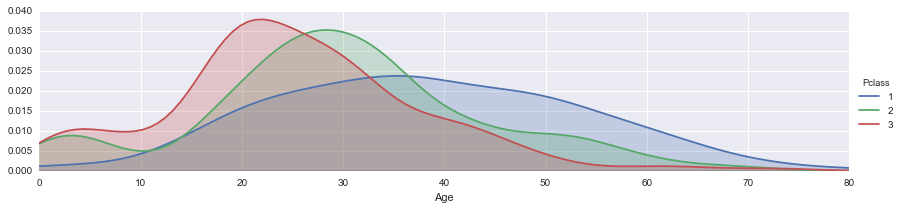

In [435]:
fig = sns.FacetGrid(titanic_df, hue='Pclass', aspect = 4)
fig.map(sns.kdeplot,'Age',shade= True)
fig.set(xlim=(0,oldest))
fig.add_legend()

Looking at age distribution by class, we can see there are more younger people in the 2nd and 3rd class while the 1st class is widely spread.

### Drop missing values in Cabin columns

In [436]:
deck = titanic_df['Cabin'].dropna()
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

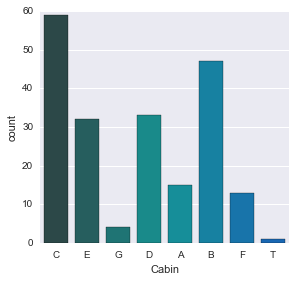

In [437]:
levels = []

for level in deck:
    levels.append(level[0])

cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']

sns.factorplot('Cabin',data=cabin_df, palette ='winter_d',kind = 'count')

Since T-Deck did not exist in Titanic deck plans, removing the dataset associated with T.

### Passengers Distribution by Deck Plans

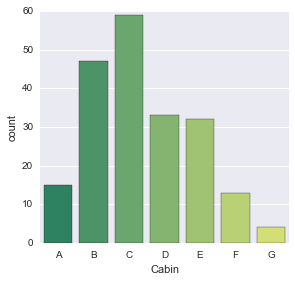

In [438]:
cabin_df = cabin_df[cabin_df.Cabin != 'T']
sns.factorplot('Cabin',data = cabin_df,palette='summer',kind='count',order=list('ABCDEFG'))

Almost half people were at either B or C Deck though only 20-25% of entire passengers has cabin information.
Will do further investigation for the relationship between survival rate and deck by class.

### Passengers Distribution by Boarding Port and Class

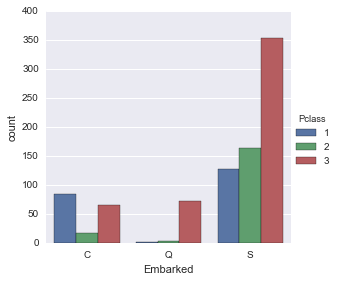

In [439]:
sns.factorplot('Embarked', data = titanic_df, kind = 'count', hue = 'Pclass', order = ['C','Q','S'])

More than half of passengers boarded in Southampton. In Cherbourg, 1st class passengers boarded the most. While there were only few 1st and 2nd class passengers from Queenstown, there were as many 3rd class passengers boarded in the city as in Cherbourg.

### Add New Column 'Alone'
To detemine whether a person is traveling alone, first add up Number of Siblings/Spouses and Number of Parents/Children.  Then, converting the sum which equals to 0 and any other number to 'Alone' and 'With Family' respectively.

In [440]:
titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone']==0] = 'Alone'

### Passengers Distribution by Traveling Alone vs With Family

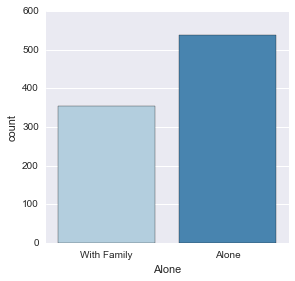

In [441]:
sns.factorplot('Alone', data=titanic_df, kind= 'count',palette = 'Blues')

We can see 1.5 more Alone passengers than with Family.

### Passengers Distribution by Class and Traveling Alone vs With Family

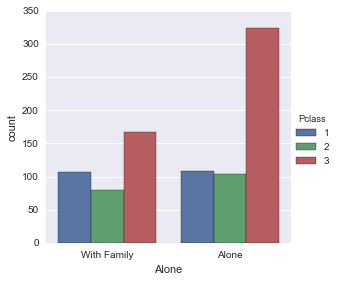

In [442]:
sns.factorplot('Alone', data=titanic_df, hue='Pclass', kind= 'count')

For 1st and 2nd class there are no significant difference in number of passengers who traveled alone vs who had family abord while there are twice as many Alone passengers as those passengers with family for 3rd class.

### Distribution of Survival

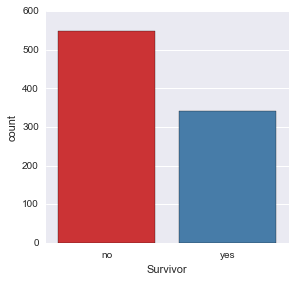

In [443]:
titanic_df['Survivor'] = titanic_df.Survived.map({0:'no',1:'yes'})

sns.factorplot('Survivor',data = titanic_df, kind = 'count',palette = 'Set1')

From the graph, we can estimate 350 survivors and 550 non-survivors, which came to survival rate of approximaltely 38%.
Now take a look if the class of the passengers had any effects on their survival rate.

### Relationship between Class and Survival Rate

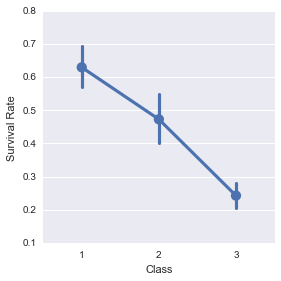

In [444]:
survival_rate_class = sns.factorplot(x='Pclass',y='Survived',data = titanic_df)
survival_rate_class.set_axis_labels('Class','Survival Rate')

The data shows the survival rate for the 3rd class is significantly lower than upper classes; we can see the lower the class was, the thinner survival rate became.

To investigate whether the result was due to the largest amount of passengers in the 3rd class, next we separate male, female, and child from the class.

### Relationship between Class and Survival Rate by Gender + Child

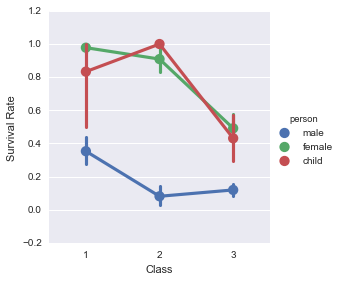

In [445]:
survival_rate_class_gender = sns.factorplot('Pclass','Survived',hue= 'person', data= titanic_df)
survival_rate_class_gender.set_axis_labels('Class','Survival Rate')

In [663]:
titanic_df.pivot_table(values='Survived', index='person',columns='Pclass',margins= True)

Pclass,1,2,3,All
person,,,,
child,0.833333,1.000000,0.431034,0.590361
female,0.978022,0.909091,0.491228,0.756458
male,0.352941,0.080808,0.119122,0.163873
All,0.629630,0.472826,0.242363,0.383838


Here it's clear that male is dropping the survival rate for the 3rd class since the survival rate for this class male is less than half of its female and child; besides, the majority of the class is male as we have seen earlier. This effect could be caused by  the ***'Women and Children First'*** policy. 

### Relationship between Age and Survival Rate

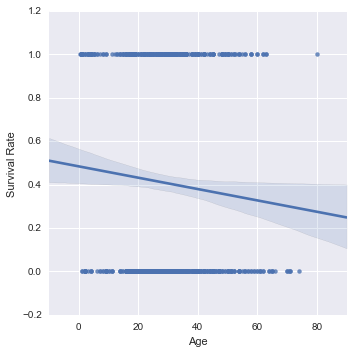

In [446]:
survival_rate_age=sns.lmplot('Age','Survived',data=titanic_df)
survival_rate_age.set_axis_labels('Age','Survival Rate')

The data shows that younger passengers have higher survival rate compared to older passengers. 

Next examine whether there is significant difference in the relationship between age and survival rate by clasees.

### Relationship between Age and Survival Rate by Class

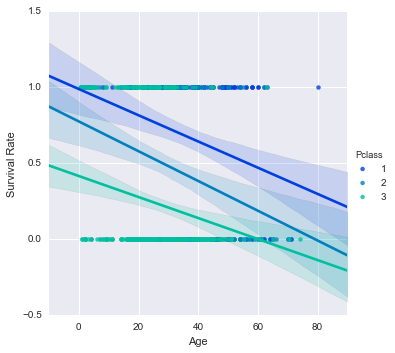

In [447]:
survival_rate_age_class=sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette = 'winter')
survival_rate_age_class.set_axis_labels('Age','Survival Rate')

There is no significant difference between classes i.e. the older the passengers were, the less likely they survived.

To clean up the figure and see further detail, we can use x_bin argument which provides an estimate of central tendency along with a confidence interval.

### Relationship between Age and Survival Rate by Class with Standard Deviation
Using x_bin argument to bin it by age and attached standard deviation.

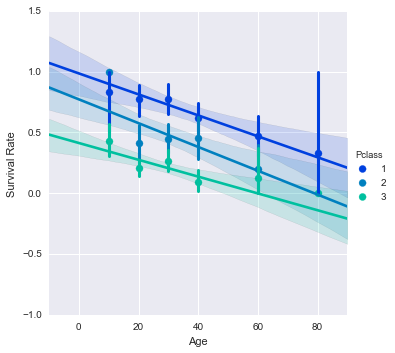

In [448]:
generations = [10,20,30,40,60,80]

survival_rate_age_class_std=sns.lmplot('Age','Survived',hue= 'Pclass', data = titanic_df, palette = 'winter',x_bins= generations)
survival_rate_age_class_std.set_axis_labels('Age','Survival Rate')

The 2nd class at age 10 has the highest survival rate, but it dropped sharply at age 20. We can also see there is high standard deviation for the 1st class at age 80.

### Relationship between Age and Survival Rate by Gender

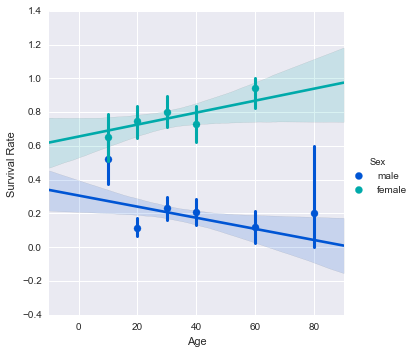

In [449]:
survival_rate_age_gender_std=sns.lmplot('Age','Survived',hue= 'Sex',data= titanic_df, palette = 'winter',x_bins =  generations)
survival_rate_age_gender_std.set_axis_labels('Age','Survival Rate')

Examinig the relationship between age and survival rate by gender, female has a positive relationship whereas male has a negative relationship.
The result of the relationship between age and femal survival rate is not what we have seen previously in the data for age and survival rate. However, we can make an assumption based on the data *"Passenger Class Distribution by Gender"* and *"Relationship between Class and Survival Rate by Gender + Child"* that this could be due to lower survival rate of female passengers in the 3rd class where the most younger passengers belonged. To validate this assumption, first take a look at female age distribution by class. Then, visualize the relationship between female age and their survival rate by class.

### Female Passenger Age Distribution by Class

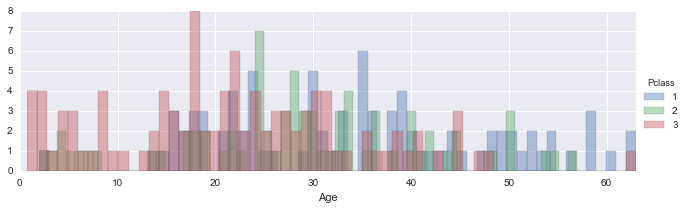

In [450]:
titanic_female_df = titanic_df[titanic_df['Sex']=='female']

fig = sns.FacetGrid(titanic_female_df, hue = 'Pclass',aspect=3)
fig.map(sns.distplot,'Age',kde = False,bins= 60)

oldest = titanic_female_df['Age'].max()
fig.set(xlim= (0,oldest))
fig.add_legend()

The data shows there are more younger female passengers in the 3rd class compared to the 1st and the 2nd class. We can also see that there was only one woman in the 3rd class who was over 50 whereas there were quite few in the 1st class.

### Female Age and Survival Rate Relationship by Class

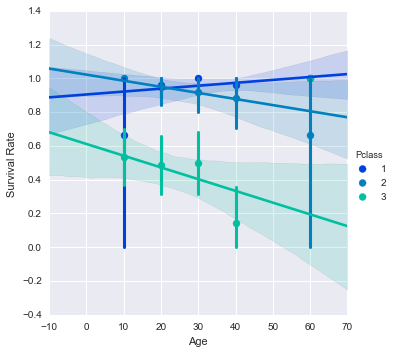

In [451]:
female_survival_rate_age_class_std=sns.lmplot('Age','Survived',hue= 'Pclass', data = titanic_female_df, palette = 'winter',x_bins= generations)
female_survival_rate_age_class_std.set_axis_labels('Age','Survival Rate')

As we've assumed, the 3rd class females lowered the overall female survival rate for younger generations.
Also, the data shows that female in 3rd class at age 40 survived less than 20% which is as low as the male at age 40. From this result, we can see that there was most likely  ***no 'Women and Children First'*** policy applied for the 3rd class.

### Add Deck Column
To find out survival rate of passengers on each deck, create definition that passes cabin and return deck level. 

In [452]:
def decklevel(cabin):
    for level in cabin:
        return str(level)[0]
    
titanic_df['Deck'] = titanic_df[['Cabin']].apply(decklevel,axis= 1)

### Survivors vs Non-Survivors by Deck

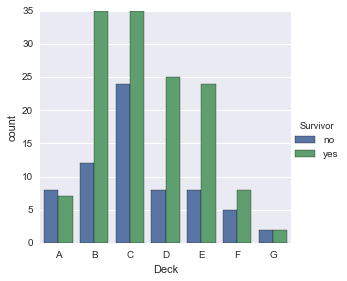

In [553]:
sns.factorplot('Deck',hue='Survivor',data=titanic_df,kind= 'count',order=list('ABCDEFG'))

This data shows that there were more or at least the same number of survivors than non-survivors for all the decks except A-Deck. This result is not relevant to the complete data as the overall survival is approx 38%. There are only 20-25% of data for deck level. We can assume that the most of missing information is for those passengers who did not survive. 

###  Survival Rate for each Deck by Gender

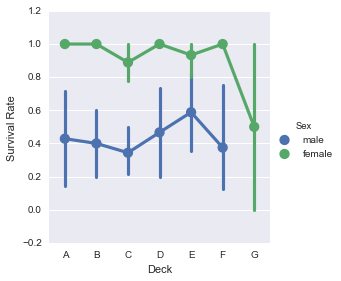

In [555]:
survival_rate_deck_by_deck=sns.factorplot('Deck', 'Survived', hue='Sex',data= titanic_df,order=list('ABCDEFG'))
survival_rate_deck_by_deck.set_axis_labels('Deck','Survival Rate')

For female, the survival rate at G-Deck is significantly lower compared to other decks;female passengers survived above 85% at all other decks. As this effect might be involved the class level, will examine the deck survival rate by class later.

The survival rate for male is extremely high for all decks, about 40%, compared to overall male survival rate 20%. We could assume the available deck data might be obtianed from the survivors.

### Survivors vs Non-Survivors for each Deck by Class
Going back to the question 2.

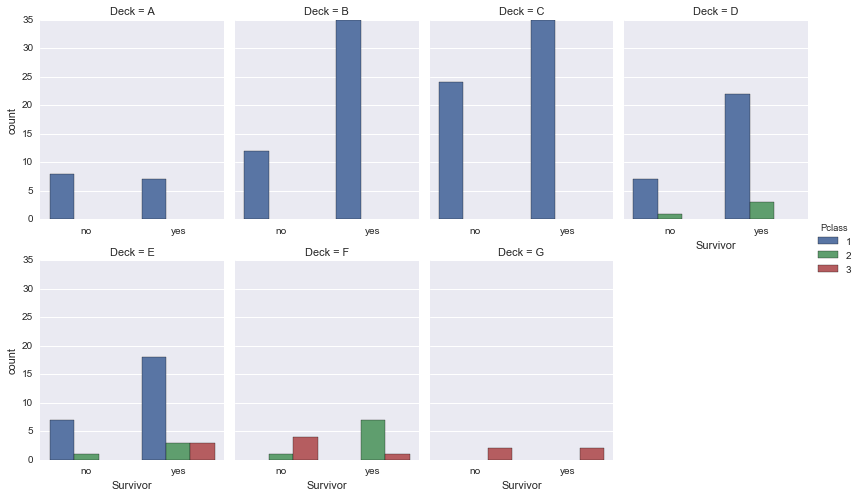

In [551]:
sns.factorplot('Survivor', col='Deck',col_wrap=4,hue='Pclass',
               data= titanic_df, kind='count', col_order=list('ABCDEFG'),
              sharex= False, size=3.5,aspect=0.8)


The data shows there were only the 1st class passengers at A through C Deck. It could be highly possible that lower class passengers were not allowed to enter these decks; however, we should not conclude this based on the data since there are too much deck information missing. 
For G-Deck, there were only third class as we've assumed earlier. This fact would be most likely the cause of unexpectedly low female survival rate at the deck.

In [658]:
titanic_df.pivot_table(values='PassengerId',index='Pclass',columns='Deck',aggfunc='count',margins=True)

Deck,A,B,C,D,E,F,G,T,n,All
Pclass,,,,,,,,,,
1,15.0,47.0,59.0,29.0,25.0,NaN,NaN,1.0,40.0,216.0
2,NaN,NaN,NaN,4.0,4.0,8.0,NaN,NaN,168.0,184.0
3,NaN,NaN,NaN,NaN,3.0,5.0,4.0,NaN,479.0,491.0
All,15.0,47.0,59.0,33.0,32.0,13.0,4.0,1.0,687.0,891.0


After examining the table above, we can see deck information was available for 1st class but not other class; over 80% 1st class deck information was available. Based on the data, we can guess there might be the deck information for the 1st class passengers recorded as they were important customers for the ship.

### Number of Family Members and Survival Rate by Gender

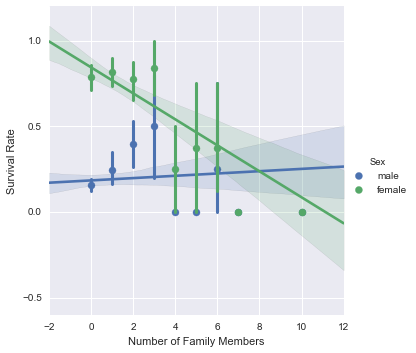

In [669]:
titanic_df['Family'] = titanic_df.SibSp + titanic_df.Parch
survival_rate_family_gender=sns.lmplot('Family','Survived', hue='Sex', data = titanic_df,x_bins = [0,1,2,3,4,5,6,7,10])
survival_rate_family_gender.set_axis_labels('Number of Family Members','Survival Rate')

There are three findings:

1.  The data shows as female passengers boarded with more family members, they less likely survived. The negative relationship between number of family members and survival rate is most likely caused by the lower survival rate 3rd class passengers having larger family than the 1st or 2nd class passengers. This can be confirmed by looking at the number of family members boarded by class.
<br/> <br/>
2.  Both male and female have the highest survival rate for family members of 3. This effec could be due to more 1st passengers than other two classes. To confirm the cause, using the same data as the first finding and check whether 1st class dominated among passengers with 3 family members.
<br/> <br/>
3.  For male passengers, the regression line looks like having a slight positive slope. The constat increase of survival rate up to family members of 3 and another upside at family memebers of 6 might has a impact on regression line and result the positive slope. Will examine if the survival rate was actually higher for those male passengers with family memeber more than 6. If the survival rate for male passengers with large family is lower than with small family, further investigation is needed.

### Number of Family Members Boarded by Class

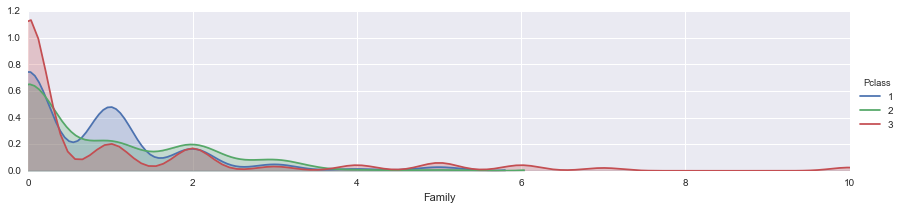

In [457]:
fig = sns.FacetGrid(titanic_df, hue='Pclass',aspect= 4)
fig.map(sns.kdeplot,'Family',shade=True)
fig.add_legend()
fig.set(xlim=(0,titanic_df['Family'].max()))

As for the first finding, we can see that the 3rd class tended to have a larger family compared to upper classes. This effect would be most likely the cause of lower survival rate for female with large family.

On the other hand, the data does not show there were more 1st class for the passengers with 3 family members. In fact, 2nd class was the most among this group, which, for male, would have a negative impact as it had the lowest survival rate 8.08%. Since 2nd class child has 100% survival rate, this might have an impact on the result. Will separate child from the genders.

### Number of Family Members and Survival Rate by Gender + Child

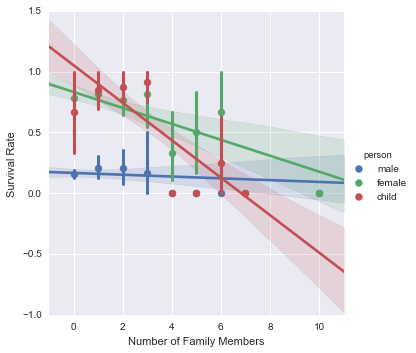

In [670]:
survival_rate_family_person=sns.lmplot('Family','Survived', hue='person', data = titanic_df,x_bins = [0,1,2,3,4,5,6,7,10])
survival_rate_family_person.set_axis_labels('Number of Family Members','Survival Rate')
survival_rate_family_person.set(xlim=(-1,11), ylim=(-1,1.5))

Now all the regressions have a negative slope, which means the more family member boarded, the less likely the passengers survived.
As we can see from the data, male with 3 family members have lower survival rate as separating child from the gender. The child could be the cause for finding three as well; it has an impact on overall male survival rate by number of family members. Will take a look at number of survivors for male with more than 6 family members.

### Survivors vs Non-Survivors  for Male with more than 6 Family Members

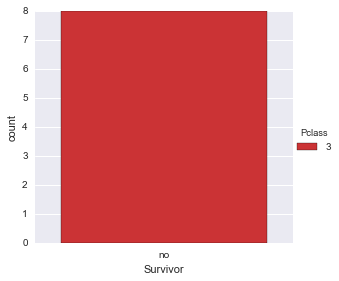

In [458]:
sns.factorplot('Survivor',data=titanic_df[(titanic_df['Family'] > 6) & (titanic_df['Sex']=='male')],hue='Pclass',kind='count',palette='Set1')

As we can see from the data, there was no survivor for male with more than 6 family memebers. 
The data obtained through *" Number of Family Members vs Survival Rate by Gender"* for male is simply a regression line and does not nearly close to fit the actual data points for larger family.

# Conclusion

1) Who were the passengers on the Titanic (Gender, Class, Age,etc)?
<br/><br/>

|           | 1st Class   | 2nd Class   | 3rd Class   | Total     |
|-----------|:-----------:|:-----------:|:-----------:|----------:|
| Child     | 6           | 19          | 58          | 83        |
| Female    | 91          | 66          | 114         | 271       |
| Male      | 119         | 99          | 319         | 537       |
| Total     | 216         | 184         | 491         | 891       |


|           | 0 < Age <= 10 | 10 < Age <= 20 | 20 < Age <= 30 | 30 < Age <= 40 | 40 < Age <= 50 | 50 < Age <= 60 | 60 < Age <= 70 | 70 < Age <= 80 | Total |
|-----------|:-------------:|:--------------:|:--------------:|:--------------:|:--------------:|:--------------:|:--------------:|:--------------:|---------------:|
| Female    | 31            | 46             | 81             | 55             | 31             | 14             | 3| 0| 261 |
| Male      | 33            | 69             | 149            | 100            | 55             | 28             | 14| 5 | 453 |
| Total     | 64            | 115            | 230            | 155            | 86             | 42             | 17| 5| 714 |



2) What deck were the passengers on and how does that relate to their class?

|           | A   | B   | C   | D   | E   | F   | G   | Subtotal | Missing Values | 
|-----------|:---:|:---:|:---:|:---:|:---:|:---:|:---:|:--------:|:--------------:|
| 1st Class | 15  | 47  | 59  | 29  | 25  | 0   | 0   | **175**  | 41             |
| 2nd Class | 0   | 0   | 0   | 4   | 4   | 8   | 0   | **16**   | 168            |
| 3rd Class | 0   | 0   | 0   | 0   | 3   | 5   | 4   | **12**   | 479            |
| Total     | 15  | 47  | 59  | 33  | 32  | 13  | 4   | **203**  | 687            | 



<br/><br/>
3) Where did the passengers come from?

More than half of passengers boarded in Southampton. In Cherbourg, 1st class passengers boarded the most. While there were only few 1st and 2nd class passengers from Queenstown, there were as many 3rd class passengers boarded in the city as in Cherbourg.
<br/><br/>

4) Who was alone and who was with family?

Approx 60% of passengers boarded alone.
For 1st and 2nd class there are no significant difference in number of passengers who traveled alone vs who had family abord whereas there are twice as many Alone passengers as those passengers with family for the 3rd class.
<br/><br/>

5) What factors helped some survive the sinking?

The overall survival rate was 38.38%.
The female and child survival rate was twice as high as the male. However, being only female or child was not enough to survive the crash. The 3rd class of female and child did significantly lower the overall female and overall child survival rate: approx 20% and 30% respectively.
Being the 1st class female had the highest ruvival rate, or 97.8% chance to survive while being the 2nd class male had only 8.08% and very low chance of survival.

|           | 1st Class   | 2nd Class   | 3rd Class   | Total     |
|-----------|:-----------:|:-----------:|:-----------:|----------:|
| Child     | 83.33%      | 100.00%     | 43.10%      | 59.03%    |
| Female    | 97.80%      | 90.91%      | 49.12%      | 75.65%    |
| Male      | 35.29%      | 8.08%       | 11.91%      | 16.39%    |
| Total     | 62.96%      | 47.28%      | 24.24%      | 38.38%    |



  * Did the deck have any effects on the passengers survival rate?
  
  Although there are no sufficient deck information (only 20-25%), there might be higher chance of survival for being at A-C Decks as there were only 1st class passengers stayed.
  
  <br/><br/>
  * Did having a family member increase odds of surviving the crash?
  
  The more family members boarded with the passenger, the less like he/she survived. 
  
